In [ ]:
# Overview of Depth-First Search Algorithm

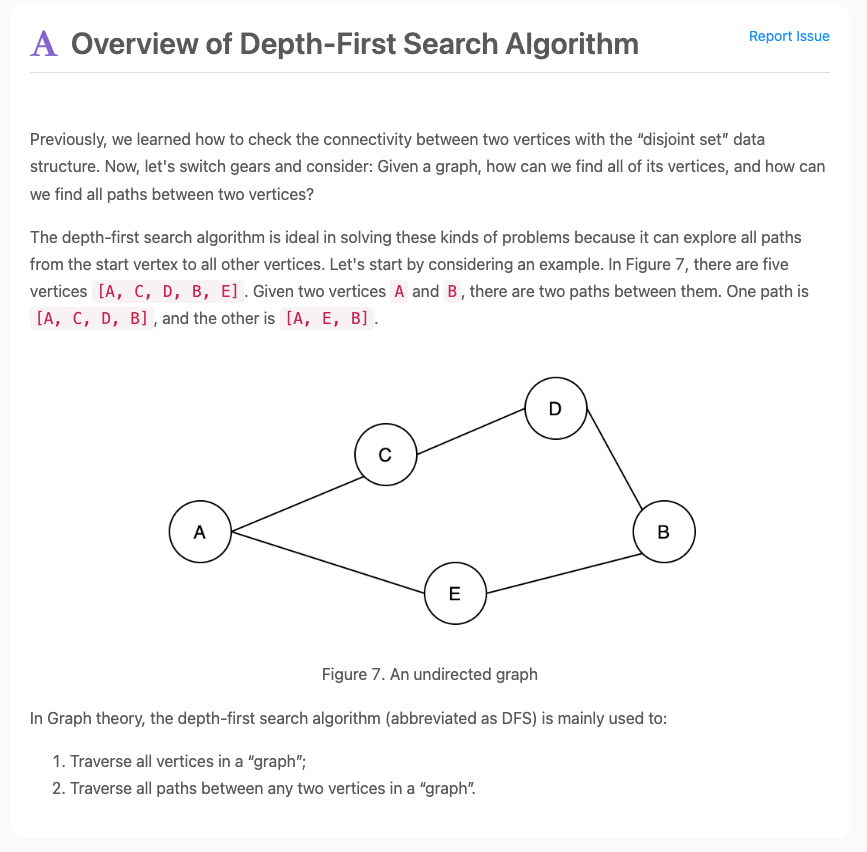

In [ ]:
# Traversing all Vertices – Depth-First Search Algorithm

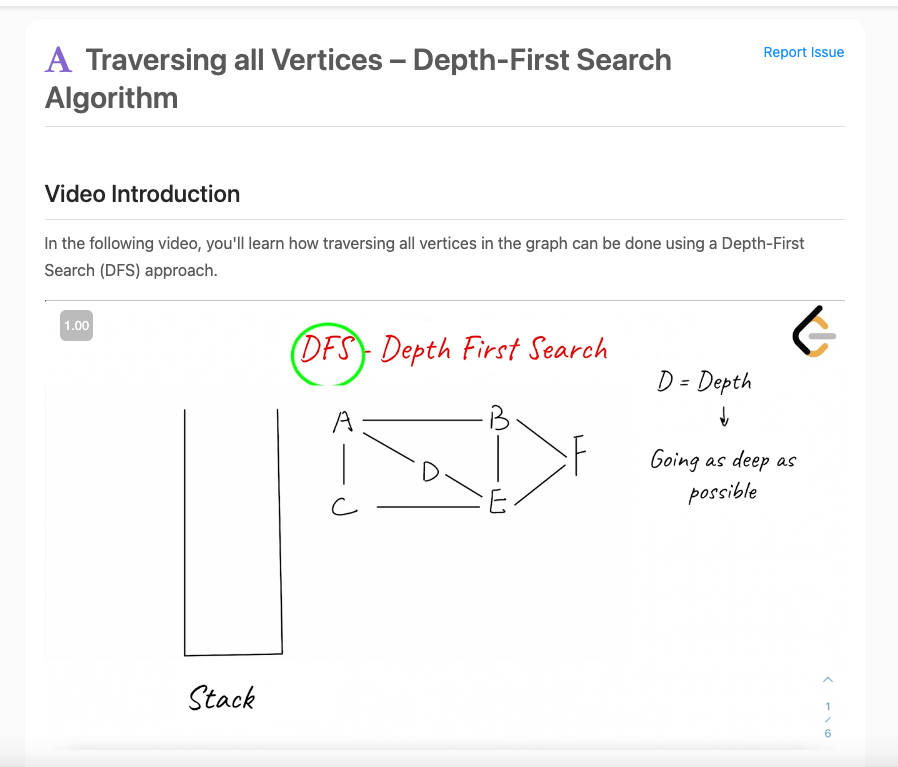

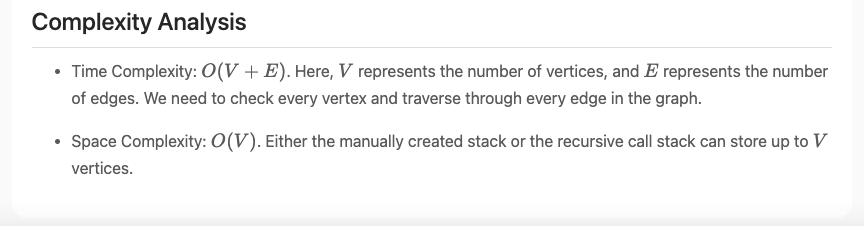

In [ ]:
# Traversing all paths between two vertices – Depth-First Search Algorithm

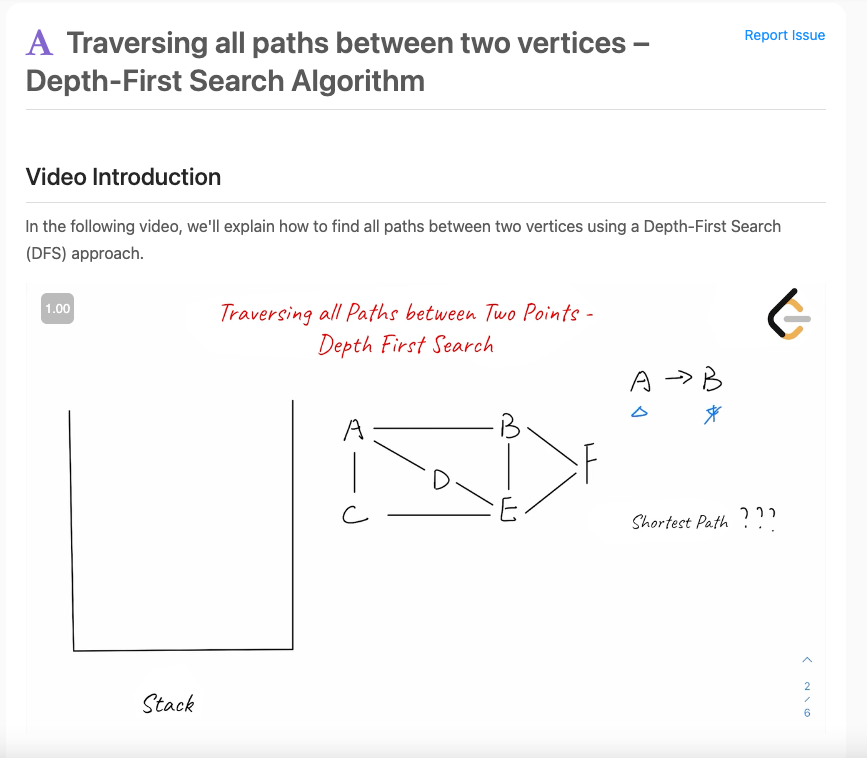

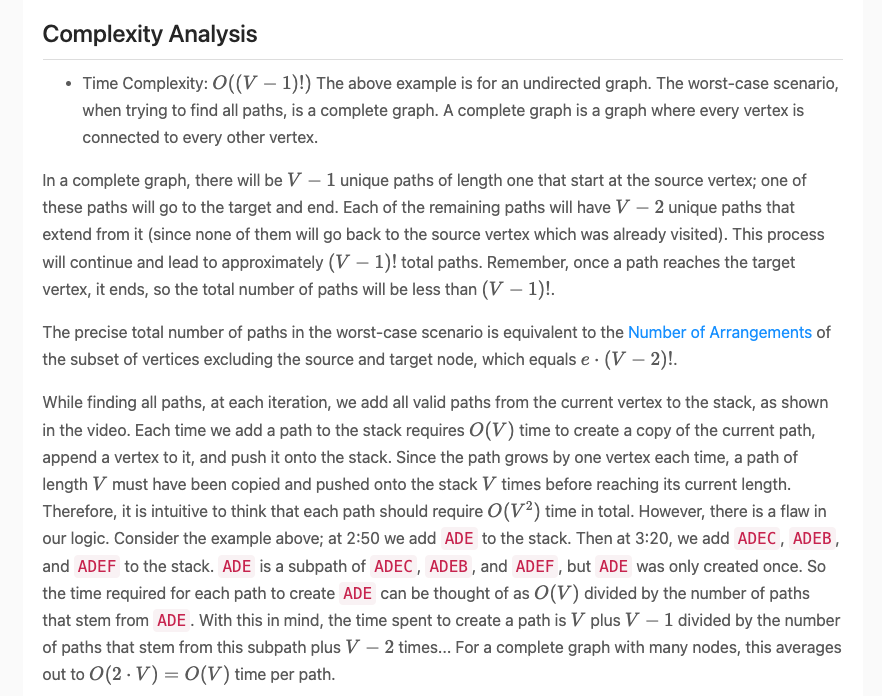

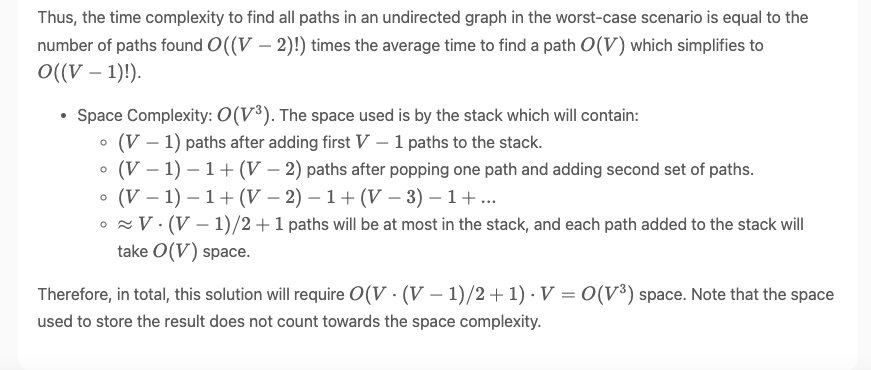

In [ ]:
# Find if Path Exists in Graph

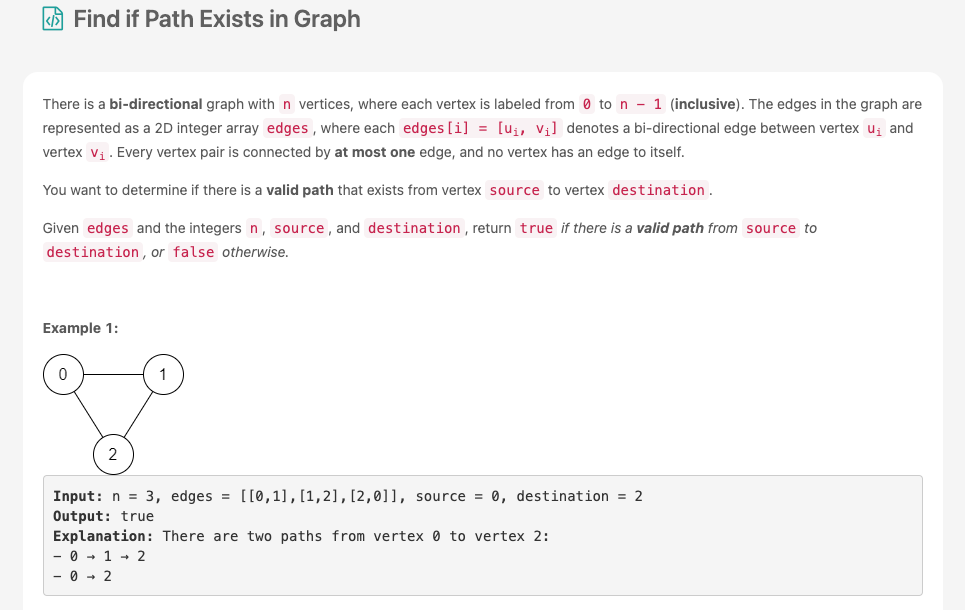

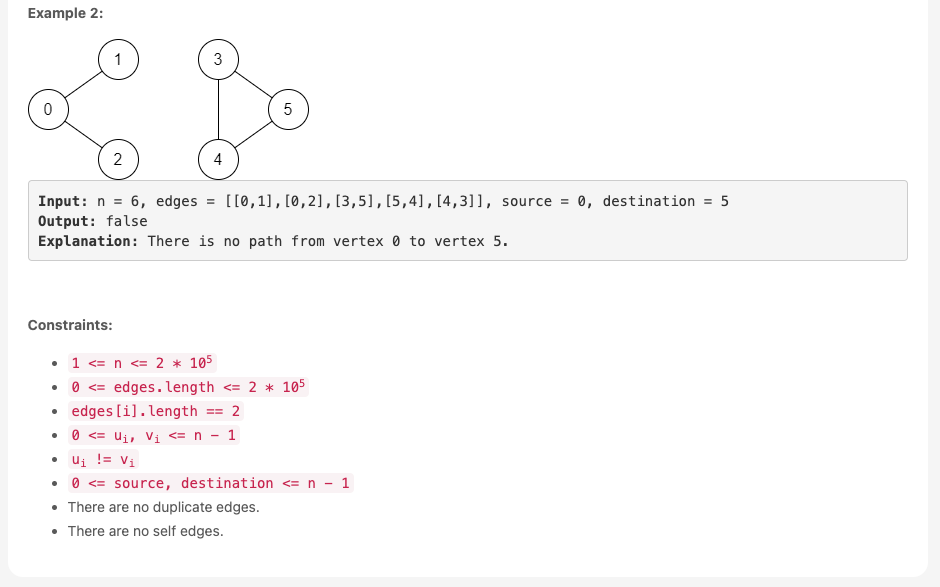

In [ ]:
# Failed v1

from collections import defaultdict

class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        self.rank = [1] * size
        self.count = size

    # The find function here is the same as that in the disjoint set with path compression.
    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]

    # The union function with union by rank
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1
            self.count -= 1

    # connected function of the “disjoint set”
    def connected(self, x, y):
        return self.find(x) == self.find(y)

    def getCount(self):
        return self.count

class Solution:
    def validPath(self, n: int, edges: List[List[int]], source: int, destination: int) -> bool:
   
        uf = UnionFind(n)
        for x in edges:            
            uf.union(x[0],x[1])

        return uf.connected(source, destination)
        





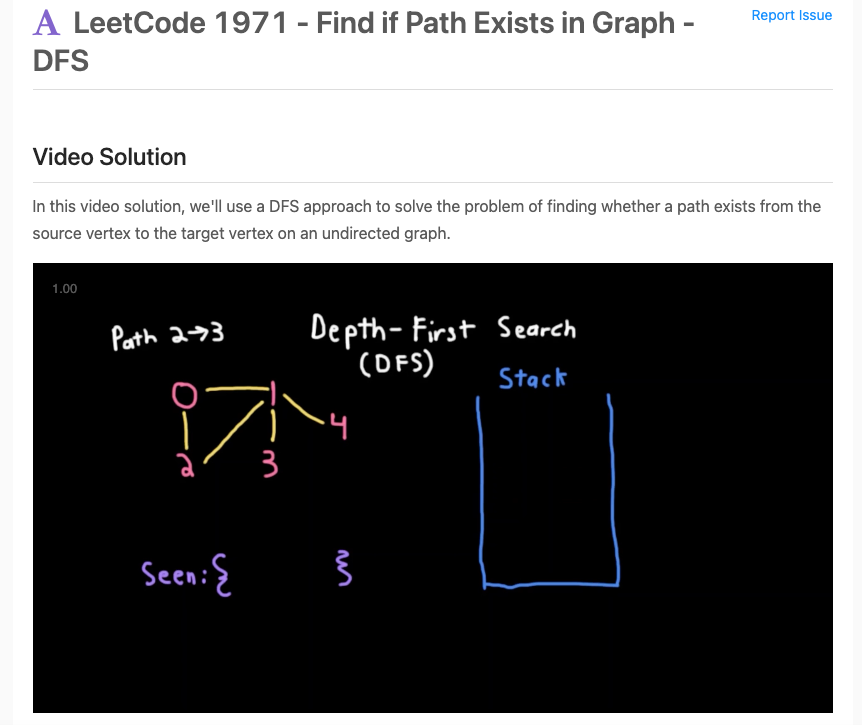

In [ ]:
class Solution:
    def validPath(self, n: int, edges: List[List[int]], start: int, end: int) -> bool:
        
        adjacency_list = [[] for _ in range(n)]
        for a, b in edges:
            adjacency_list[a].append(b)
            adjacency_list[b].append(a)
        
        stack = [start]
        seen = set()
        
        while stack:
            # Get the current node.
            node = stack.pop()
            
            # Check if we have reached the target node.
            if node == end:
                return True
            
            # Check if we've already visited this node.
            if node in seen:
                continue
            seen.add(node)
            
            # Add all neighbors to the stack.
            for neighbor in adjacency_list[node]:
                stack.append(neighbor)
        
        # Our stack is empty and we did not reach the end node.
        return False

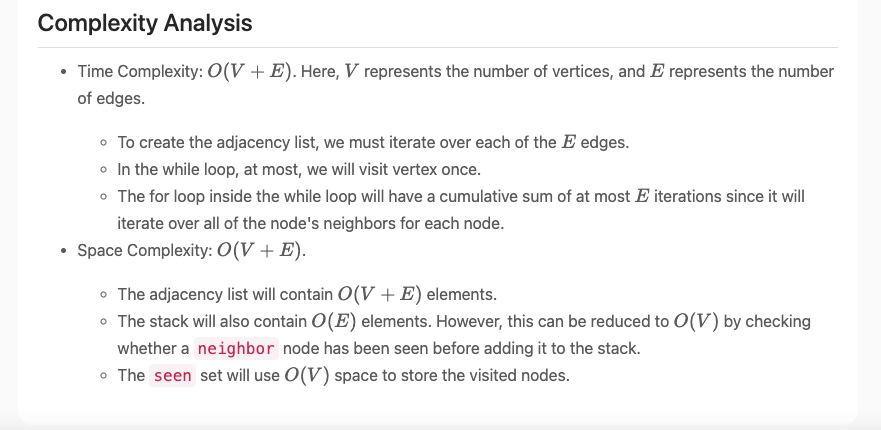

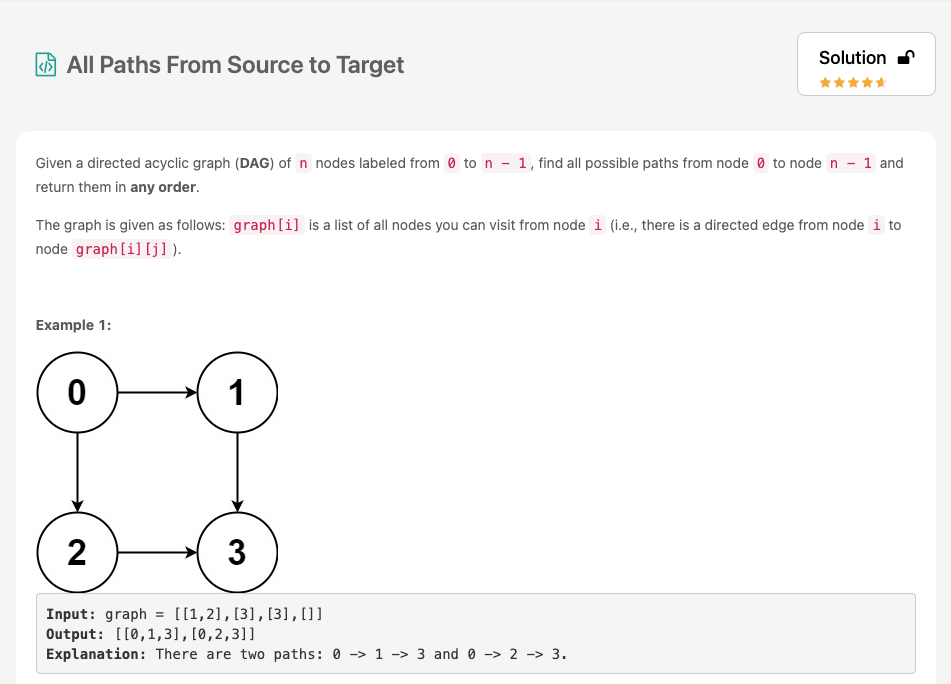

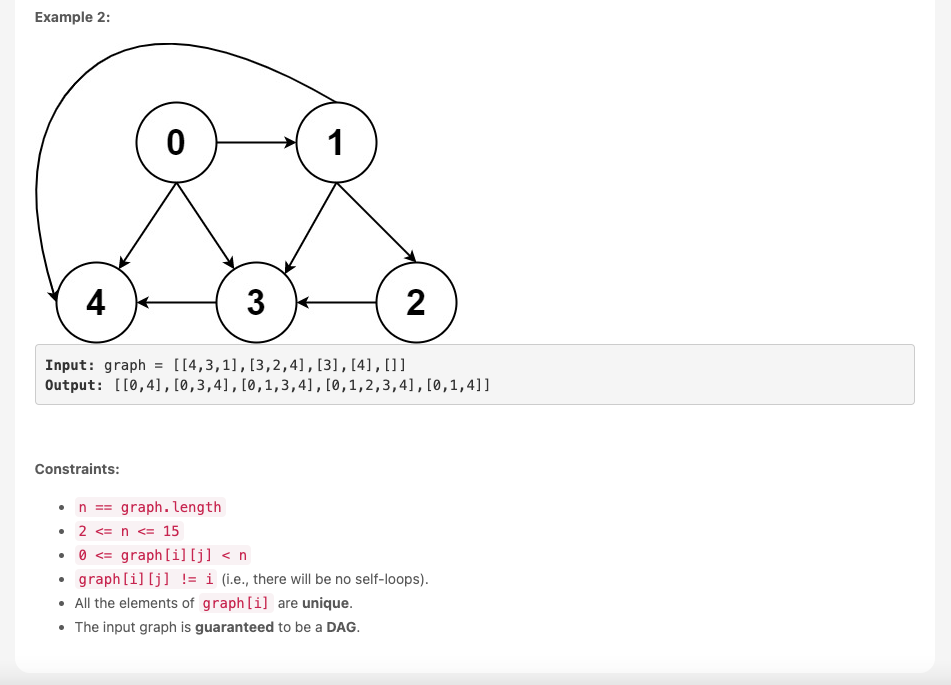

In [ ]:
# Failed v1

class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        
        start = 0
        end = len(graph)-1

        # adjacency_list = [[] for _ in range(len(graph))]
        # for a, b in graph:
        #     adjacency_list[a].append(b)
        #     adjacency_list[b].append(a)
        adjacency_list = graph
        
        stack = [start]
        seen = set()
        
        path_list = []
        path = []
        while stack:
            # Get the current node.
            node = stack.pop()
            print("Path:",path)
            print("Seen:",seen)
            print("Stack:",stack)
            print('Node:',node)
            print()
            # Check if we have reached the target node.
            if node == end:
                path.append(node)
                path_list.append(path)
                path = list(path)
                path.pop()
                continue
            
            # Check if we've already visited this node.
            if node in seen:
                if path:path.pop()
                continue
                
            seen.add(node)
            
            if adjacency_list[node]:
                path.append(node)
                stack.append(node)
            
            # Add all neighbors to the stack.
            for neighbor in adjacency_list[node]:
                stack.append(neighbor)
        
        # Our stack is empty and we did not reach the end node.
        return path_list



In [ ]:
# Failed v2
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        
        start = 0
        end = len(graph)-1

        adjacency_list = graph

        stack = [start]
        seen = set()
        path_list = []
        while stack:
            # Get the current node.
            node = stack.pop()
            
            # Check if we have reached the target node.
            if node == end:
                path_list.append([node])
                continue
                # return True
            
            # Check if we've already visited this node.
            if node in seen:
                continue
            seen.add(node)
            
            # Add all neighbors to the stack.
            for neighbor in adjacency_list[node]:
                stack.append(neighbor)
        
        # Our stack is empty and we did not reach the end node.
        return path_list



In [ ]:
# 尝试递归  Backtrack
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        
        start = 0
        end = len(graph)-1

        adjacency_list = graph

        def backtrack(node, seen, path):
            seen.add(node)
            path.append(node)
            
#             print('Path:',path)
#             print('Seen:',seen)
#             print('Node:',node)
            

            if node == end:
                new_path = list(path)
                seen.remove(node)
                path.pop()
                return [new_path,]

            path_list = []
            for neighbor in adjacency_list[node]:

                # Move on to the next row with the updated board state
                
                path_list += backtrack(neighbor, seen, path)

            seen.remove(node)
            path.pop()
            
            return path_list
        
        seen = set()
        path = []
        path_list = backtrack(start,seen,path)
        
 
        # Our stack is empty and we did not reach the end node.
        return path_list



In [ ]:
# Accepeted v2. For this is a directed graph. There is no need for the seen set.
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        
        start = 0
        end = len(graph)-1
        adjacency_list = graph

        def backtrack(node, path):
            path.append(node)
            
#             print('Path:',path)
#             print('Seen:',seen)
#             print('Node:',node)
            
            if node == end:
                new_path = list(path)
                path.pop()
                return [new_path,]

            path_list = []
            for neighbor in adjacency_list[node]:
                # Move on to the next row with the updated board state
                path_list += backtrack(neighbor, path)

            path.pop()
            
            return path_list
        
        path = []
        path_list = backtrack(start,path)
        
 
        # Our stack is empty and we did not reach the end node.
        return path_list



In [ ]:
# Solution v0  利用好了引用
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        def dfs(node):
            path.append(node)
            if node == len(graph) - 1:
                paths.append(path.copy())
                return

            next_nodes = graph[node]
            for next_node in next_nodes:
                dfs(next_node)
                path.pop()

        paths = []
        path = []
        if not graph or len(graph) == 0:
            return paths
        dfs(0)
        return paths

In [ ]:
# Solution v1
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:

        target = len(graph) - 1
        results = []

        def backtrack(currNode, path):
            # if we reach the target, no need to explore further.
            if currNode == target:
                results.append(list(path))
                return
            # explore the neighbor nodes one after another.
            for nextNode in graph[currNode]:
                path.append(nextNode)
                backtrack(nextNode, path)
                path.pop()
        # kick of the backtracking, starting from the source node (0).
        path = deque([0])
        backtrack(0, path)

        return results

In [ ]:
# Approach 2: Top-Down Dynamic Programming
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:

        target = len(graph) - 1

        # apply the memoization
        @lru_cache(maxsize=None)
        def allPathsToTarget(currNode):
            if currNode == target:
                return [[target]]

            results = []
            for nextNode in graph[currNode]:
                for path in allPathsToTarget(nextNode):
                    results.append([currNode] + path)

            return results

        return allPathsToTarget(0)

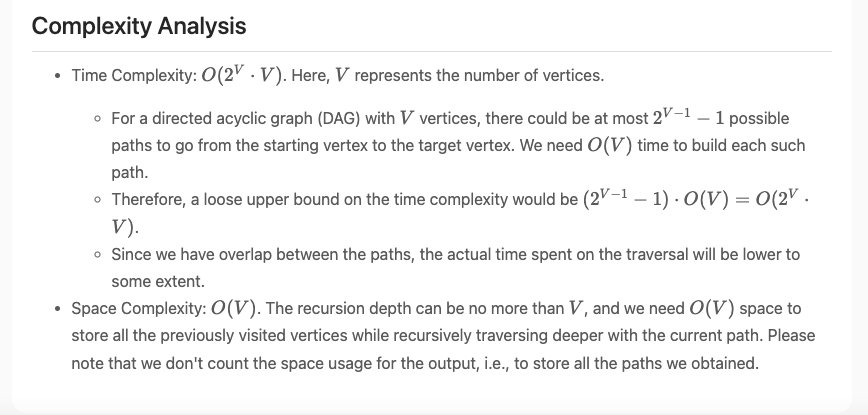

In [ ]:
# Clone Graph

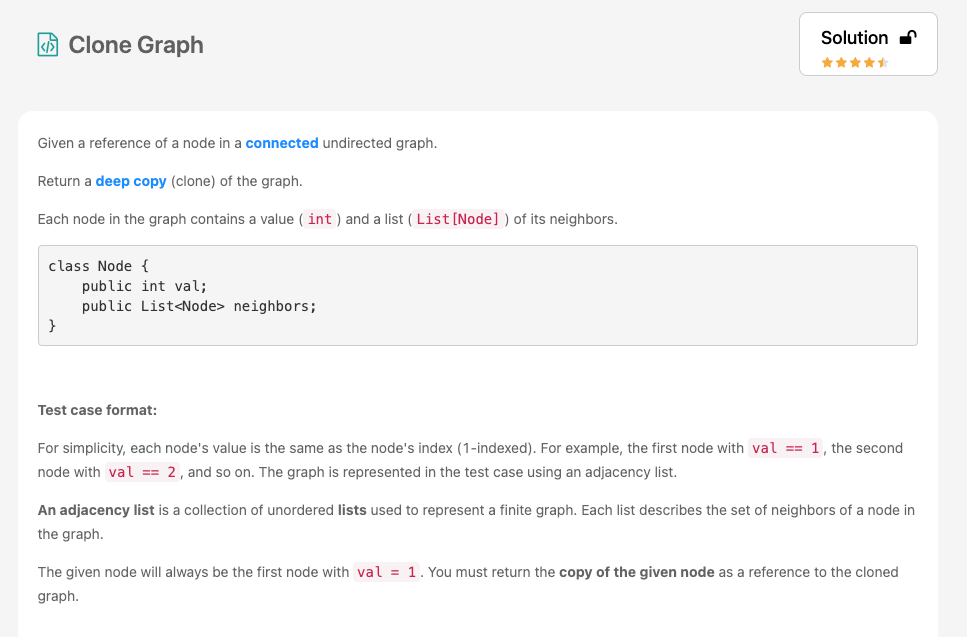

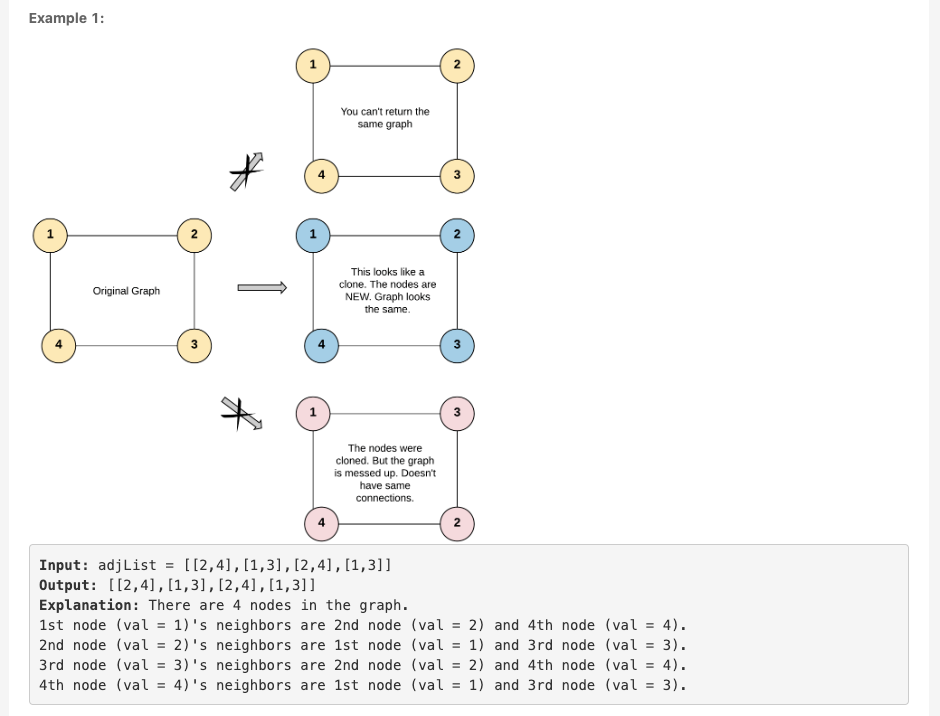

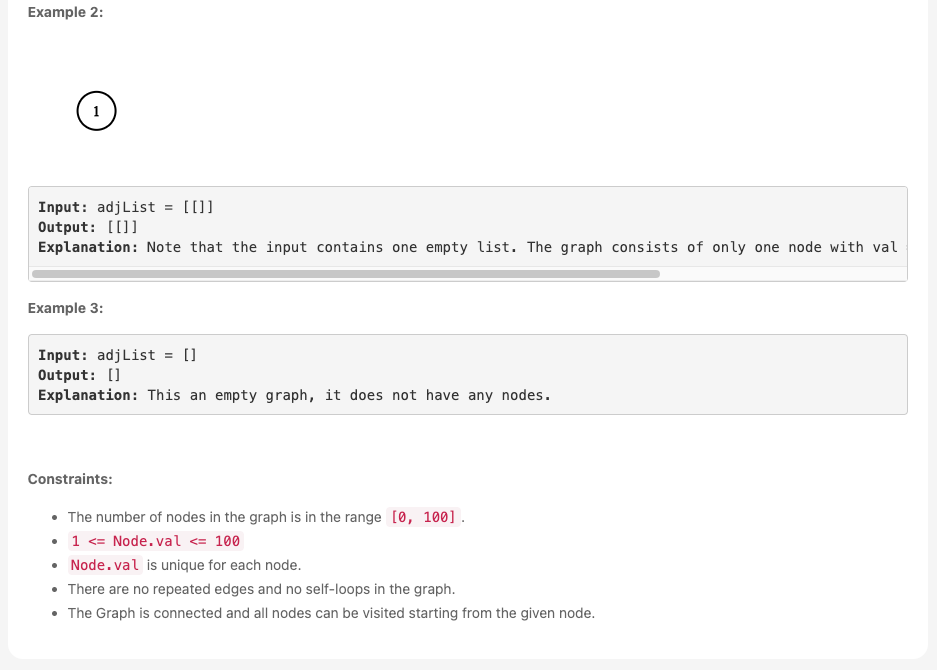

In [ ]:
# Failed v1
"""
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []
"""

class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        
        seen = set()
        
        def dfs(node):
            new_node = Node(node.val)
            for tmp in node.neighbors:
                if not tmp in seen:
                    new_node.neighbors.append(dfs(tmp))
                    seen.add(tmp)
            return new_node
        
        new_graph = dfs(node)
        return new_graph

In [ ]:
# Accepted v1
"""
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []
"""

class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        
        node_mapping = {}
        
        def dfs(node):
            if not node:
                return None
            
            # print(node.val)
            # print(seen)
            # print()
            if node.val in node_mapping:
                return node_mapping[node.val]

            new_node = Node(node.val)
            node_mapping[node.val] = new_node
            for tmp in node.neighbors:
                # if not tmp.val in seen:
                new_tmp = dfs(tmp)
                if new_tmp:
                    new_node.neighbors.append(new_tmp)

            return new_node
        
        new_graph = dfs(node)
        return new_graph

In [ ]:
# DFS Solution
"""
# Definition for a Node.
class Node(object):
    def __init__(self, val, neighbors):
        self.val = val
        self.neighbors = neighbors
"""
class Solution(object):

    def __init__(self):
        # Dictionary to save the visited node and it's respective clone
        # as key and value respectively. This helps to avoid cycles.
        self.visited = {}

    def cloneGraph(self, node):
        """
        :type node: Node
        :rtype: Node
        """
        if not node:
            return node

        # If the node was already visited before.
        # Return the clone from the visited dictionary.
        if node in self.visited:
            return self.visited[node]

        # Create a clone for the given node.
        # Note that we don't have cloned neighbors as of now, hence [].
        clone_node = Node(node.val, [])

        # The key is original node and value being the clone node.
        self.visited[node] = clone_node

        # Iterate through the neighbors to generate their clones
        # and prepare a list of cloned neighbors to be added to the cloned node.
        if node.neighbors:
            clone_node.neighbors = [self.cloneGraph(n) for n in node.neighbors]

        return clone_node

In [ ]:
# Approach 2: Breadth First Search
"""
# Definition for a Node.
class Node(object):
    def __init__(self, val, neighbors):
        self.val = val
        self.neighbors = neighbors
"""
from collections import deque
class Solution(object):

    def cloneGraph(self, node):
        """
        :type node: Node
        :rtype: Node
        """

        if not node:
            return node

        # Dictionary to save the visited node and it's respective clone
        # as key and value respectively. This helps to avoid cycles.
        visited = {}

        # Put the first node in the queue
        queue = deque([node])
        # Clone the node and put it in the visited dictionary.
        visited[node] = Node(node.val, [])

        # Start BFS traversal
        while queue:
            # Pop a node say "n" from the from the front of the queue.
            n = queue.popleft()
            # Iterate through all the neighbors of the node
            for neighbor in n.neighbors:
                if neighbor not in visited:
                    # Clone the neighbor and put in the visited, if not present already
                    visited[neighbor] = Node(neighbor.val, [])
                    # Add the newly encountered node to the queue.
                    queue.append(neighbor)
                # Add the clone of the neighbor to the neighbors of the clone node "n".
                visited[n].neighbors.append(visited[neighbor])

        # Return the clone of the node from visited.
        return visited[node]